In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = r"D:\Work\workspace_20210329_Pavan\Exp1405nm_2021-03-17_21-36-31_results"
df = pd.read_csv(path+'/QC.csv')

In [6]:
def split_well(df):
    well_split = df.Well.str.split(r'X|Y', expand=True)
    df['X'] = well_split[1]
    df['Y'] = well_split[2]
    return df

def tagging(df):
    df = split_well(df)
    
    df.loc[df.X == '0', 'Conc'] = '1 nM'
    df.loc[df.X == '1', 'Conc'] = '10 nM'
    df.loc[df.X == '2', 'Conc'] = '100 nM'
    df.loc[df.X == '3', 'Conc'] = '250 nM'
    df.loc[df.X == '4', 'Conc'] = '500 nM'
    df.loc[(df.Y == '1')|(df.Y == '3')|(df.Y == '5'), 'Conc'] = '0'
    df.loc[(df.Well == 'X0Y0')|(df.Well == 'X2Y0'), 'Conc'] = '1000 nM'
    df.loc[(df.Well == 'X1Y0')|(df.Well == 'X3Y0'), 'Conc'] = '5000 nM'
    df.loc[(df.Well == 'X4Y0'), 'Conc'] == 'X'
    
    df.loc[(df.Y == '2')|(df.Y == '3'), 'Cond'] = 'PiB'
    df.loc[(df.Y == '4')|(df.Y == '5'), 'Cond'] = 'PiBDS'
    df.loc[(df.Well == 'X0Y0')|(df.Well == 'X1Y0')|(df.Well == 'X0Y1')|(df.Well == 'X1Y1'), 'Cond'] = 'PiB'
    df.loc[(df.Well == 'X2Y0')|(df.Well == 'X3Y0')|(df.Well == 'X2Y1')|(df.Well == 'X3Y1'), 'Cond'] = 'PiBDS'
    df.loc[(df.Well == 'X4Y0')|(df.Well == 'X4Y1'), 'Cond'] ='ThT'
    
    PiB_df = df.loc[df.Cond == 'PiB']
    PiBDS_df = df.loc[df.Cond == 'PiBDS']
    ThT_df = df.loc[df.Cond == 'ThT']
    
    return PiB_df, PiBDS_df, ThT_df

PiB_df, PiBDS_df, ThT_df = tagging(df)

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


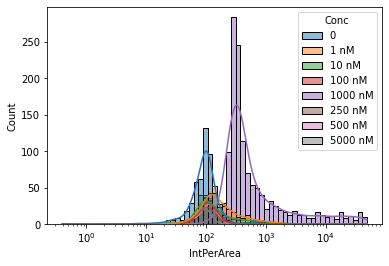

In [7]:
# PiB
PiB_df = PiB_df.sort_values(by=['Conc'])
fig = plt.figure()
ax = sns.histplot(data=PiB_df, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.show()

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


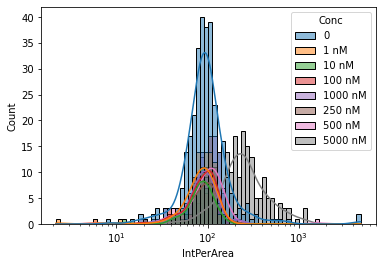

In [8]:
# PiB-DS
PiBDS_df = PiBDS_df.sort_values(by=['Conc'])
fig = plt.figure()
ax = sns.histplot(data=PiBDS_df, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.show()

D:\Anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


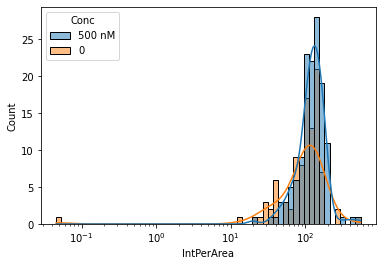

In [11]:
# ThT
fig = plt.figure()
ax = sns.histplot(data=ThT_df, x='IntPerArea', hue='Conc', kde=True, log_scale=True)
plt.show()

In [21]:
path = r"D:\Work\DLA_test\samples_results"
df = pd.read_csv(path+'/QC.csv')

In [6]:
df.Condition1.unique()

array(['10 uM', '5 uM', '1 uM'], dtype=object)

In [26]:
def summarising_df(df):
    rm_list = ['FoV', 'NArea', 'IntegratedInt', 'IntPerArea']
    keep_list = list(df.columns.difference(rm_list))
    df = df.groupby(keep_list +['FoV']).size()
    df = df.reset_index(drop=False)
    df = df.groupby(keep_list).mean()
    df = df.reset_index(drop=False)
    return df

In [27]:
a = summarising_df(df)
a

,Well,0
0,X0Y0,293.5
1,X0Y1,136.0
2,X0Y2,272.0
3,X1Y0,900.0
